In [10]:
import pandas as pd
import numpy as np
import random
import os

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
sample_submission = pd.read_csv('./sample_submission.csv')

In [11]:
word_to_num = {"부채 통합" :0, "주택 개선":1, "주요 구매":2, "신용 카드": 3, "휴가": 4, "의료": 5, "자동차":6, "소규모 사업": 7, "이사": 8,"주택":9, "재생 에너지":10, "기타": 11}
train['대출목적'] = train['대출목적'].replace(word_to_num)
wtn={"RENT": 0, "MORTGAGE": 1, "OWN":2, "ANY": 3}
train['주택소유상태'] = train['주택소유상태'].replace(wtn)

wtn={"A": 1, "B": 2, "C": 3,"D":4, "E":5, "F":6,"G":7}
train['대출등급'] = train['대출등급'].replace(wtn)

train['ID'] = train['ID'].str.replace('TRAIN_', '')
train['대출기간'] = train['대출기간'].str.replace('months', '')
train['대출기간'] = train['대출기간'].str.replace('month', '')
train['근로기간'] = train['근로기간'].str.replace('years', '')
train['근로기간'] = train['근로기간'].str.replace('year', '')
train['근로기간'] = train['근로기간'].str.replace('<', '')
train['근로기간'] = train['근로기간'].str.replace('+', '')
train['근로기간'] = train['근로기간'].str.replace('Unknown',"NaN")
train['근로기간'] = train['근로기간'].str.replace('NaN',"0")

In [12]:
word_to_num = {"부채 통합" :0, "주택 개선":1, "주요 구매":2, "신용 카드": 3, "휴가": 4, "의료": 5, "자동차":6, "소규모 사업": 7, "이사": 8,"주택":9, "재생 에너지":10, "기타": 11, "결혼": 12}
test['대출목적'] = test['대출목적'].replace(word_to_num)
wtn={"RENT": 0, "MORTGAGE": 1, "OWN":2, "ANY": 3}
test['주택소유상태'] = test['주택소유상태'].replace(wtn)

test['ID'] = test['ID'].str.replace('TEST_', '')
test['대출기간'] = test['대출기간'].str.replace('months', '')
test['대출기간'] = test['대출기간'].str.replace('month', '')
test['근로기간'] = test['근로기간'].str.replace('months', '')
test['근로기간'] = test['근로기간'].str.replace('years', '')
test['근로기간'] = test['근로기간'].str.replace('year', '')
test['근로기간'] = test['근로기간'].str.replace('<', '')
test['근로기간'] = test['근로기간'].str.replace('+', '')
test['근로기간'] = test['근로기간'].str.replace('Unknown',"NaN")
test['근로기간'] = test['근로기간'].str.replace('NaN',"0")
test=test.fillna(0)
test = test.astype('float32')
train=train.astype('float32')

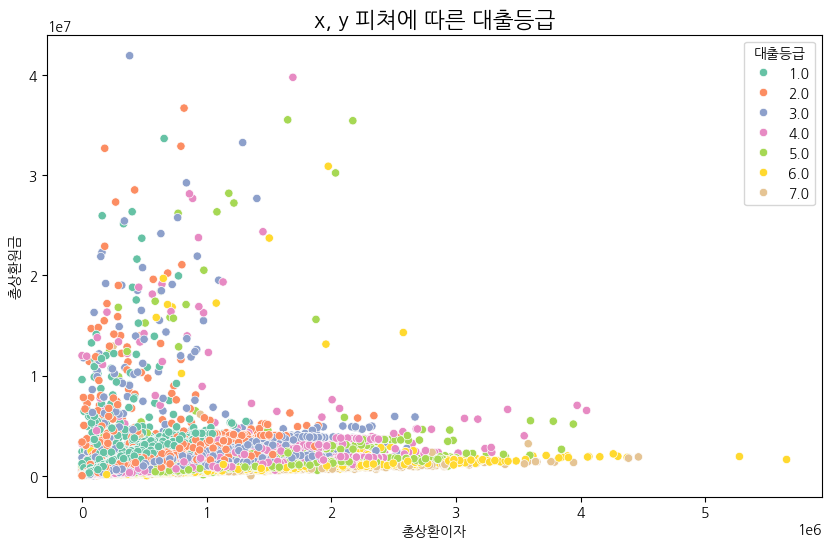

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 원본 DataFrame 복사
new_df = train.copy()

# '총상환이자'와 '총상환원금' 제곱하여 새로운 특성 생성
new_df['총상환이자'] = new_df['총상환이자']
new_df['총상환원금'] = new_df['총상환원금']

# 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=new_df, x='총상환이자', y='총상환원금', hue='대출등급', palette='Set2')
plt.title('x, y 피쳐에 따른 대출등급', fontsize=16)
plt.show()

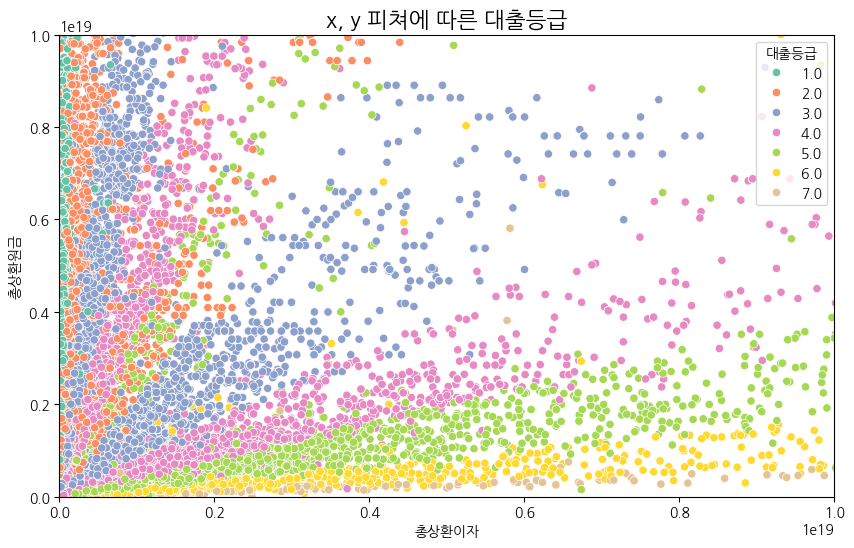

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 원본 DataFrame 복사
new_df = train.copy()

# '총상환이자'와 '총상환원금' 제곱하여 새로운 특성 생성
new_df['총상환이자'] = new_df['총상환이자'] ** 3
new_df['총상환원금'] = new_df['총상환원금'] ** 3

# 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=new_df, x='총상환이자', y='총상환원금', hue='대출등급', palette='Set2')
plt.ylim(0,10**19)
plt.xlim(0,10**19)
plt.title('x, y 피쳐에 따른 대출등급', fontsize=16)
plt.show()

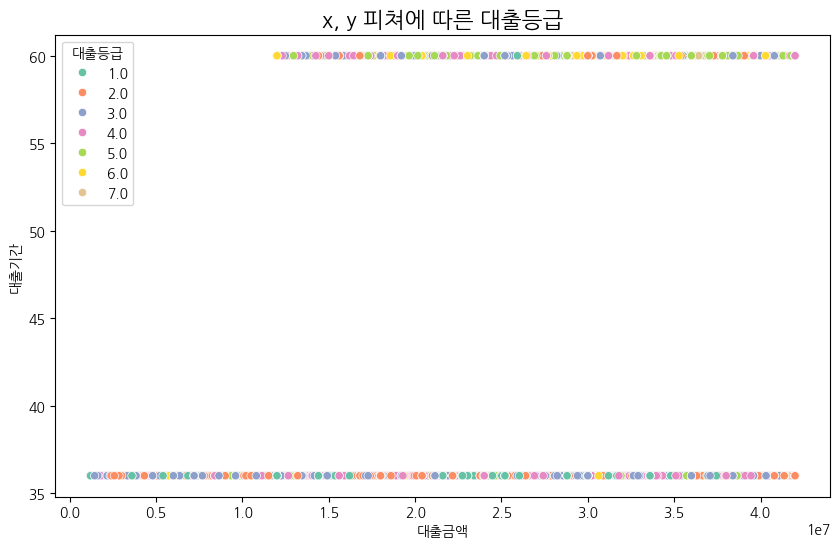

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 원본 DataFrame 복사
new_df = train.copy()

# 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=new_df, x='대출금액', y='대출기간', hue='대출등급', palette='Set2')
plt.title('x, y 피쳐에 따른 대출등급', fontsize=16)
plt.show()

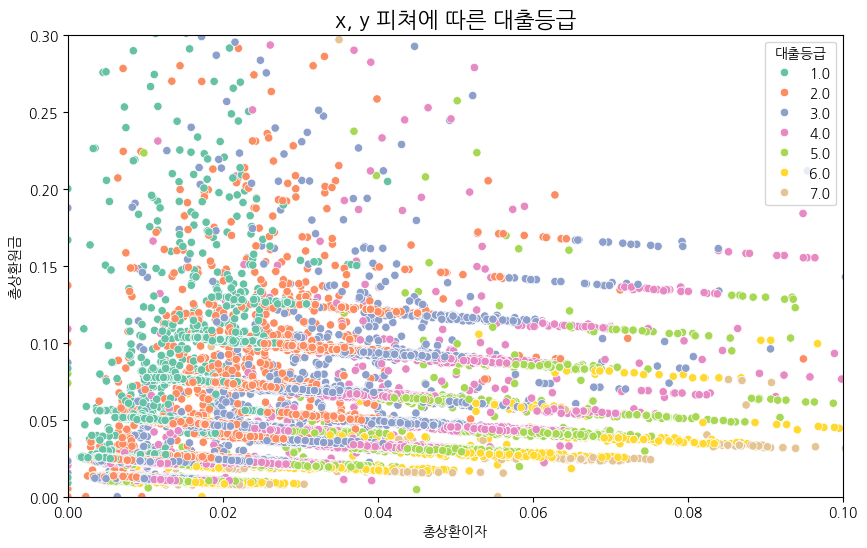

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 원본 DataFrame 복사
new_df = train.copy()

# '총상환이자'와 '총상환원금' 제곱하여 새로운 특성 생성
new_df['총상환이자'] = new_df['총상환이자']/new_df['대출금액']
new_df['총상환원금'] = new_df['총상환원금']/new_df['대출금액']

# 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=new_df, x='총상환이자', y='총상환원금', hue='대출등급', palette='Set2')
plt.ylim(0,0.3)
plt.xlim(0,0.1)
plt.title('x, y 피쳐에 따른 대출등급', fontsize=16)
plt.show()

In [20]:
#Bagging



from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# 원본 DataFrame 복사
ntrain = train.copy()
ntest = test.copy()

# 새로운 특성 생성
ntrain['주택소유상태'] = ntrain['총상환이자'] / ntrain['대출금액']
ntrain['대출목적'] = ntrain['총상환원금'] / ntrain['대출금액']

ntest['주택소유상태'] = ntest['총상환이자'] / ntest['대출금액']
ntest['대출목적'] = ntest['총상환원금'] / ntest['대출금액']

ntrain.replace([np.inf, -np.inf], [-1,-1], inplace=True)
ntest.replace([np.inf, -np.inf], [-1,-1], inplace=True)

ntrain.fillna(0, inplace=True)
ntest.fillna(0, inplace=True)

lit = ["대출목적", "주택소유상태", "대출기간", "총상환이자", "총상환원금"]
train_x = ntrain[lit].values
train_y = ntrain['대출등급'].values

tx, tstx, ty, tsty = train_test_split(train_x, train_y, train_size=0.80, random_state=92)

test_x = ntest[lit].values

# 모델 생성 및 학습
model = BaggingClassifier(random_state=22, n_estimators=248, bootstrap=True, oob_score=True, bootstrap_features=True)
model.fit(tx, ty)
print(model.oob_score_)

# 모델을 사용하여 예측
tsty_pred = model.predict(tstx)

# 예측이 틀린 샘플 확인
incorrect_indices = np.where(tsty != tsty_pred)[0]
incorrect_samples = tstx[incorrect_indices]
true_labels = tsty[incorrect_indices]
predicted_labels = tsty_pred[incorrect_indices]

# 예측이 틀린 샘플 정보 출력
for i, (sample, true_label, predicted_label) in enumerate(zip(incorrect_samples, true_labels, predicted_labels)):
    print(f"Sample {i+1} - True Label: {true_label}, Predicted Label: {predicted_label}, Sample Features: {sample}")

# 정확도 출력
accuracy = accuracy_score(tsty, tsty_pred)
print(f"Accuracy: {accuracy}")

# 테스트 데이터에 대한 예측
pred = model.predict(test_x)
pr = pred.round().astype(int)

# 최종 제출 파일 생성
sub = pd.read_csv('sample_submission.csv')
sub['대출등급'] = pr
sub['대출등급'] = sub['대출등급'].replace({1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E', 6: 'F', 7: 'G'})
sub.to_csv("submission.csv", index=False)

0.9511261115077562
Sample 1 - True Label: 1.0, Predicted Label: 2.0, Sample Features: [ 0.  0. 36.  0.  0.]
Sample 2 - True Label: 6.0, Predicted Label: 3.0, Sample Features: [ 0.  0. 60.  0.  0.]
Sample 3 - True Label: 4.0, Predicted Label: 2.0, Sample Features: [ 0.  0. 36.  0.  0.]
Sample 4 - True Label: 5.0, Predicted Label: 3.0, Sample Features: [ 0.  0. 60.  0.  0.]
Sample 5 - True Label: 1.0, Predicted Label: 2.0, Sample Features: [ 0.  0. 36.  0.  0.]
Sample 6 - True Label: 1.0, Predicted Label: 2.0, Sample Features: [ 0.  0. 36.  0.  0.]
Sample 7 - True Label: 2.0, Predicted Label: 1.0, Sample Features: [1.0720933e-01 2.0743333e-02 3.6000000e+01 3.7338000e+05 1.9297680e+06]
Sample 8 - True Label: 6.0, Predicted Label: 3.0, Sample Features: [ 0.  0. 60.  0.  0.]
Sample 9 - True Label: 2.0, Predicted Label: 3.0, Sample Features: [ 0.  0. 60.  0.  0.]
Sample 10 - True Label: 3.0, Predicted Label: 2.0, Sample Features: [4.76660e-01 2.32900e-02 3.60000e+01 2.79480e+04 5.71992e+05]


In [21]:
#ap



from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# 원본 DataFrame 복사
ntrain = train.copy()
ntest = test.copy()

# 새로운 특성 생성
ntrain['주택소유상태'] = ntrain['총상환이자'] / ntrain['대출금액']
ntrain['대출목적'] = ntrain['총상환원금'] / ntrain['대출금액']

ntest['주택소유상태'] = ntest['총상환이자'] / ntest['대출금액']
ntest['대출목적'] = ntest['총상환원금'] / ntest['대출금액']

ntrain.replace([np.inf, -np.inf], [1, -1], inplace=True)
ntest.replace([np.inf, -np.inf], [1, -1], inplace=True)

ntrain.fillna(0, inplace=True)
ntest.fillna(0, inplace=True)

lit = ["대출목적", "주택소유상태", "대출기간", "총상환이자", "총상환원금"]
other_lit = ["연간소득", "대출기간", "대출금액", "총계좌수", "부채_대비_소득_비율"]

# train/test split
train_x, test_x, train_y, test_y = train_test_split(ntrain[lit].values, ntrain['대출등급'].values, train_size=0.6, random_state=42)
trainx, testx, trainy, testy = train_test_split(ntrain[other_lit].values, ntrain['대출등급'].values, train_size=0.6, random_state=42)

# lit 값이 0인 행만 추출
zero_indices = np.where(np.any(ntest[lit] == 0, axis=1))[0]

# 모델 초기화 (a)
model_a = RandomForestClassifier(n_estimators=248, random_state=42)
model_a.fit(train_x, train_y)

# a 로 예측
pred_a = model_a.predict(ntest[lit].values)

# lit 값이 0인 경우 b 모델로 예측값으로 덮어씌우기
model_b = BaggingClassifier(n_estimators=248, random_state=42)
model_b.fit(trainx, trainy)
pred_b = model_b.predict(ntest[other_lit].values)

# 결과 합치기
final_pred = pred_a

# lit가 0인 경우에는 b 모델로 예측값으로 덮어씌우기
final_pred[zero_indices] = pred_b[zero_indices]

# 정확도 계산
accuracy_a = accuracy_score(test_y, model_a.predict(test_x))
print(f"a Accuracy: {accuracy_a}")
accuracy_b = accuracy_score(testy, model_b.predict(testx))
print(f"b Accuracy: {accuracy_b}")

# 최종 제출 파일 생성
sub = pd.read_csv('sample_submission.csv')
sub['대출등급'] = final_pred
sub['대출등급'] = sub['대출등급'].replace({1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E', 6: 'F', 7: 'G'})
sub.to_csv("submission.csv", index=False)

a Accuracy: 0.9501012513629992
b Accuracy: 0.3372189625629576


In [22]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# 원본 DataFrame 복사
ntrain = train.copy()
ntest = test.copy()

# 새로운 특성 생성
ntrain['주택소유상태'] = ntrain['총상환이자'] / ntrain['대출금액']
ntrain['대출목적'] = ntrain['총상환원금'] / ntrain['대출금액']
ntrain['연체계좌수'] = ntrain['총상환원금']/ntrain['대출기간']
ntrain['총계좌수'] = ntrain['근로기간']/ntrain['총상환원금']

ntest['주택소유상태'] = ntest['총상환이자'] / ntest['대출금액']
ntest['대출목적'] = ntest['총상환원금'] / ntest['대출금액']
ntest['연체계좌수'] =  ntest['총상환원금']/ntest['대출기간']
ntest['총계좌수'] =  ntest['근로기간']/ntest['총상환원금']

ntrain.replace([np.inf, -np.inf], [-1,-1], inplace=True)
ntest.replace([np.inf, -np.inf], [-1,-1], inplace=True)

ntrain.fillna(0, inplace=True)
ntest.fillna(0, inplace=True)

lit = ["대출목적", "주택소유상태", "대출기간", "총상환이자", "총상환원금"]
train_x = ntrain[lit].values
train_y = ntrain['대출등급'].values


test_x = ntest[lit].values

# 모델 생성 및 학습
model = BaggingClassifier(random_state=22, n_estimators=248, bootstrap=True, oob_score=True, bootstrap_features=True)
model.fit(train_x, train_y)
print(model.oob_score_)

# 모델을 사용하여 예측
tsty_pred = model.predict(tstx)

# 예측이 틀린 샘플 확인
incorrect_indices = np.where(tsty != tsty_pred)[0]
incorrect_samples = tstx[incorrect_indices]
true_labels = tsty[incorrect_indices]
predicted_labels = tsty_pred[incorrect_indices]

# 예측이 틀린 샘플 정보 출력
for i, (sample, true_label, predicted_label) in enumerate(zip(incorrect_samples, true_labels, predicted_labels)):
    print(f"Sample {i+1} - True Label: {true_label}, Predicted Label: {predicted_label}, Sample Features: {sample}")

# 정확도 출력
accuracy = accuracy_score(tsty, tsty_pred)
print(f"Accuracy: {accuracy}")

# 테스트 데이터에 대한 예측
pred = model.predict(test_x)
pr = pred.round().astype(int)

# 최종 제출 파일 생성
sub = pd.read_csv('sample_submission.csv')
sub['대출등급'] = pr
sub['대출등급'] = sub['대출등급'].replace({1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E', 6: 'F', 7: 'G'})
sub.to_csv("submission.csv", index=False)

0.9522711695432737
Sample 1 - True Label: 1.0, Predicted Label: 2.0, Sample Features: [ 0.  0. 36.  0.  0.]
Sample 2 - True Label: 6.0, Predicted Label: 3.0, Sample Features: [ 0.  0. 60.  0.  0.]
Sample 3 - True Label: 4.0, Predicted Label: 2.0, Sample Features: [ 0.  0. 36.  0.  0.]
Sample 4 - True Label: 5.0, Predicted Label: 3.0, Sample Features: [ 0.  0. 60.  0.  0.]
Sample 5 - True Label: 1.0, Predicted Label: 2.0, Sample Features: [ 0.  0. 36.  0.  0.]
Sample 6 - True Label: 1.0, Predicted Label: 2.0, Sample Features: [ 0.  0. 36.  0.  0.]
Sample 7 - True Label: 6.0, Predicted Label: 3.0, Sample Features: [ 0.  0. 60.  0.  0.]
Sample 8 - True Label: 2.0, Predicted Label: 3.0, Sample Features: [ 0.  0. 60.  0.  0.]
Sample 9 - True Label: 4.0, Predicted Label: 3.0, Sample Features: [ 0.  0. 60.  0.  0.]
Sample 10 - True Label: 3.0, Predicted Label: 2.0, Sample Features: [ 0.  0. 36.  0.  0.]
Sample 11 - True Label: 3.0, Predicted Label: 2.0, Sample Features: [ 0.  0. 36.  0.  0.]
